# Dataset Description  
*CSV file - 62766 rows * 49 columns 

# Attributes 
Location
Make
Model                      
Short_description          
Price                      
Mileage                   
Gearbox                    
Registration              
Fuel_type                  
Power                      
Seller                      
Body_type                 
Type                       
Drivetrain                 
Seats                      
Doors                      
Country_version           
Offer_number               
Warranty                   
Mileage                    
First_registration         
Production_date            
General_inspection         
Last_service               
Full_service_history        
Non_smoker_vehicle          
Previous_owner            
Last_timing_belt_change    
Power                       
Gearbox                     
Engine_size
Gears                 
Cylinders                  
Empty_weight               
Fuel_type                  
Fuel_consumption          
Co2_emissions              
Emission_class            
Emissions_sticker          
Comfort & Convenience
Entertainment & Media
Safety & Security
Extras   
Colour                 
Manufacturer_color      
Paint                    
Upholstery_colour        
Upholstery  

# Import necessary libraries  

In [5]:
import pandas as pd
import re
import datetime
import seaborn as sns
#from sklearn import preprocessing
from numpy import nan
import numpy as np
import matplotlib.pyplot as plt

 # Import the CSV Data as Pandas DataFrame

In [48]:
df_origin = pd.read_csv("data.csv")
df = df_origin.copy()
df.head()

,Unnamed: 0,location,make,model,short_description,price,mileage,gearbox,registration,fuel_type,...,emissions_sticker,\nComfort & Convenience\n,\nEntertainment & Media\n,\nSafety & Security\n,extras,\ncolour,\nmanufacturer_color,\npaint,upholstery_colour,upholstery
0,0,"LOON OP ZAND, NL","\n,Audi ,\n","\n,A3,\n",2.0 FSI Ambition Pro Line,"[['\n', '€ 4,450.-', '\n']]","['', ['191,066 km']]","\n,Automatic,\n",08/2003,"\n,Gasoline,\n",...,"\n,None,\n","[['Air conditioning', 'Armrest', 'Automatic cl...","[['CD player', 'Radio']]","[['ABS', 'Alarm system', 'Central door lock', ...",[['Alloy wheels']],"\n4, Grey",NaN,"\npaint, Metallic","\nupholstery, Black","\n8, Cloth"
1,1,"HEERLEN, NL","\n,Audi ,\n","\n,A3,\n",Sportback 1.4 TFSI Ambiente/ECC/PDC//Lichtmeta...,"[['\n', '€ 12,950.-', '\n']]","['', ['94,758 km']]","\n,Automatic,\n",10/2013,"\n,Gasoline,\n",...,"\n,None,\n","[['Air conditioning', 'Automatic climate contr...","[['CD player', 'Radio']]","[['Alarm system', 'Central door lock', 'Centra...","[['Alloy wheels (16"")']]","\n4, White",NaN,NaN,"\nupholstery, Black","\n8, Cloth"
2,3,"BAARLE-NASSAU, NL","\n,Audi ,\n","\n,A1,\n",1.4 TFSI Sportback Pro-Line Aut. S-Tronic Navi.,"[['\n', '€ 12,450.-', '\n']]","['', ['145,102 km']]","\n,Automatic,\n",06/2015,"\n,Gasoline,\n",...,"\n,None,\n","[['Air conditioning', 'Armrest', 'Automatic cl...","[['Bluetooth', 'CD player', 'On-board computer...","[['ABS', 'Central door lock with remote contro...","[['Alloy wheels (15"")']]","\n4, Grey",NaN,"\npaint, Metallic",NaN,NaN
3,4,"ZUTPHEN, NL","\n,Audi ,\n","\n,A1,\n",S-Line | Automaat | Navigatie | Cruise-/Climat...,"[['\n', '€ 14,945.-', '\n']]","['', ['119,666 km']]","\n,Automatic,\n",10/2015,"\n,Gasoline,\n",...,"\n,None,\n","[['Air conditioning', 'Armrest', 'Automatic cl...","[['CD player', 'MP3', 'On-board computer', 'Ra...","[['ABS', 'Alarm system', 'Bi-Xenon headlights'...","[['Alloy wheels (17"")', 'Shift paddles', 'Spor...","\n4, Black",NaN,NaN,"\nupholstery, Black","\n8, Part leather"
4,7,"HAAKSBERGEN, NL","\n,Audi ,\n","\n,A3,\n",Sportback 1.5 TFSI Sport | Dealer Onderhouden ...,"[['\n', '€ 24,900.-', '\n']]","['', ['55,815 km']]","\n,Automatic,\n",10/2017,"\n,Gasoline,\n",...,"\n,None,\n","[['Air conditioning', 'Armrest', 'Electrical s...","[['CD player', 'On-board computer', 'Radio']]","[['ABS', 'Alarm system', 'Bi-Xenon headlights'...","[['Alloy wheels (17"")', 'Sport seats', 'Sport ...","\n4, Grey",NaN,"\npaint, Metallic","\nupholstery, Black","\n8, Cloth"


 # Dataset information

 * Check Missing values
 * Check Dublicates
 * Check data type
 * Check the number of unique values of each column

In [287]:
df.shape

(62766, 49)

In [235]:
df.isnull().sum()

Unnamed: 0                       0
location                         0
make                             0
model                            0
short_description              149
price                            0
mileage                          0
gearbox                          0
registration                    37
fuel_type                        0
power                            0
seller                           0
body_type                        0
type                             0
drivetrain                       0
seats                            0
doors                            0
country_version                  0
offer_number                     0
warranty                         0
Mileage                          0
first_registration              37
production_date              56210
general_inspection           15038
last_service                 62766
full_service_history             0
non_smoker_vehicle               0
previous_owner                   0
last_timing_belt_cha

In [236]:
df.duplicated().sum()

0

In [237]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62766 entries, 0 to 62765
Data columns (total 49 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unnamed: 0               62766 non-null  int64  
 1   location                 62766 non-null  object 
 2   make                     62766 non-null  object 
 3   model                    62766 non-null  object 
 4   short_description        62617 non-null  object 
 5   price                    62766 non-null  object 
 6   mileage                  62766 non-null  object 
 7   gearbox                  62766 non-null  object 
 8   registration             62729 non-null  object 
 9   fuel_type                62766 non-null  object 
 10  power                    62766 non-null  object 
 11  seller                   62766 non-null  object 
 12  body_type                62766 non-null  object 
 13  type                     62766 non-null  object 
 14  drivetrain            

In [238]:
df.nunique()

Unnamed: 0                   62766
location                      2344
make                            20
model                          754
short_description            54368
price                         8179
mileage                      45618
gearbox                         10
registration                   302
fuel_type                       12
power                          361
seller                           5
body_type                       13
type                             5
drivetrain                       4
seats                           11
doors                            7
country_version                 27
offer_number                 50143
warranty                        17
Mileage                          2
first_registration             297
production_date                 25
general_inspection              93
last_service                     0
full_service_history             2
non_smoker_vehicle               2
previous_owner                  12
last_timing_belt_cha

In [226]:
df.describe()

,Unnamed: 0,production_date,last_service,\nmanufacturer_color
count,62766.000000,6556.000000,0.0,0.0
mean,35563.827709,2014.969951,NaN,NaN
std,20562.958458,5.392130,NaN,NaN
min,0.000000,1997.000000,NaN,NaN
25%,17718.250000,2011.000000,NaN,NaN
50%,35595.500000,2016.000000,NaN,NaN
75%,53391.750000,2020.000000,NaN,NaN
max,71103.000000,2022.000000,NaN,NaN


 # Insights
 * Numerical values and punctuation marks in the names of locations will be removed.
 *

 # Exploring Dataset

# 2 column name: location  


In [293]:
# # location sütunundaki tüm verileri büyük harfe çevirelim
# df['location'] = df['location'].str.upper()

# # NL öncesindeki kelimelerden noktalama ve sayısal değerleri silelim
# df['location'] = df['location'].apply(lambda x: re.sub(r'[^\w\s]*\d*', '', x.split(',')[0]) + ',NL')
# df['location'] = df['location'].apply(lambda x: re.sub(r"\bSGRAVEV", r"'S-GRAVE", x))

# # şehir ismi olmayanları Hollandada en fazla araç satışının yapıldığı bölgeye ekledim.(4 satır) 
# df.loc[df['location'] == ',NL', 'location'] = 'AMSTERDAM ZUIDOOST,NL'

# #Özel yazım şekli isteyen bazı şehirleri değiştirelim.
# a = ['GRAVENHAGE', 'HERTOGENBOSCH', 'GRAVENZANDE', 'HEER ARENDSKERKE', 'GRAVENPOLDER', 'GRAVENDEEL', 'GRAVENLAND', 'HEERENBERG', 'HARDE','T ZAND', 'GOY', 'BERGEN','AMSTERDAMZUIDOOST' ]
# b = ["'S-GRAVENHAGE, NL", "'S-HERTOGENBOSCH, NL", "'S-GRAVENZANDE, NL", "'S-HEER ARENDSKERKE, NL", "'S-GRAVENPOLDER, NL", "'S-GRAVENDEEL, NL", "'S-GRAVENLAND, NL", "'S-HEERENBERG, NL", "'T-HARDE, NL", "'T-ZAND, NL", "'T-GOY, NL","BERGEN, NL",'AMSTERDAM ZUIDOOST,NL' ]

# for i, row in df.iterrows():
#     location = row["location"]
#     for word in a:
#         if word in location:
#             index = a.index(word)
#             location = b[index]
#             break
#     df.at[i, "location"] = location

# df["location"].head(5)

# 3 Column Name: Make

In [294]:
df["make"]


0         \n,Audi ,\n
1         \n,Audi ,\n
2         \n,Audi ,\n
3         \n,Audi ,\n
4         \n,Audi ,\n
             ...     
62761    \n,Volvo ,\n
62762    \n,Volvo ,\n
62763    \n,Volvo ,\n
62764    \n,Volvo ,\n
62765    \n,Volvo ,\n
Name: make, Length: 62766, dtype: object

In [295]:
df["make"]=df["make"].str.strip(',\n\r')
df['make'].value_counts()

BMW               6942
Volkswagen        6436
Mercedes-Benz     5860
Audi              5675
Volvo             4734
Renault           4255
Ford              4036
Peugeot           3492
Toyota            2783
Skoda             2588
Kia               2502
Opel              2342
Hyundai           2271
Mazda             2161
Citroen           2146
Fiat              1923
Honda              948
Dacia              829
Chevrolet          427
Tesla              416
Name: make, dtype: int64

# 4 Column Name: model

!! sütun hala temiz degil,,

In [296]:
df["model"]


0         \n,A3,\n
1         \n,A3,\n
2         \n,A1,\n
3         \n,A1,\n
4         \n,A3,\n
           ...    
62761    \n,S60,\n
62762    \n,S60,\n
62763    \n,S60,\n
62764    \n,S40,\n
62765    \n,S60,\n
Name: model, Length: 62766, dtype: object

In [219]:
df["model"]=df["model"].str.strip(',\n') 
df['model'] = df["model"].str.rstrip("['\\n' ,]")
df['model'] = df["model"].str.lstrip("[ '\\n' ]")
#regex = r'^[a-zA-Z].*$'

df["model"].unique()

array(['A3', 'A1', 'A5', 'A7', 'S5', 'RS3', 'S3', 'RS7', 'A2', 'TT', 'A4',
       'S4', 'TTS', 'Cabriolet', 'R8', 'RS4', 'RS5', 'TT RS', 'Q5', 'Q3',
       'Q2', 'Q7', 'Allroad', 'A4 allroad', 'RS Q8', 'SQ7', 'SQ8', 'SQ5',
       'A6', 'A6 allroad', 'S6', 'RS6', 'V8', 'S8', 'A8', 'S1', 'SQ2',
       'Others', 'S7', 'Q8', 'e-tron GT', 'e-tro', 'Q4 e-tro', '316',
       '320', '116', '120', '140', '118', '135', '535', '328', '420',
       '418', '330', '550', '430', '435', '335', '318', '440', '340',
       '130', '114', '325', '125', '218', 'M3', '640', '220', '323', 'Z4',
       '428', '228', '645', '650', '235', '630', 'Z3', 'M6', 'M4', '240',
       'Z8', 'Z4 M', 'Z3 M', '230', '123', 'i8', 'M2', 'X3', 'X1', 'X5',
       'X6', 'X2', 'X7 M', 'X6 M', 'X4 M', 'X3 M', 'X5 M', 'X4', 'X2 M',
       '523', '520', '525', '530', '540', '528', '545', 'M5', '740',
       '750', '730', '745', '735', '760', 'M850', '840', '728', '225',
       '216', '214', 'X7', '620', '425', '518', 'i3', 'i4', '

In [220]:
df["model"]=df["model"].str.replace("None","Others")

df["model"].unique()

array(['A3', 'A1', 'A5', 'A7', 'S5', 'RS3', 'S3', 'RS7', 'A2', 'TT', 'A4',
       'S4', 'TTS', 'Cabriolet', 'R8', 'RS4', 'RS5', 'TT RS', 'Q5', 'Q3',
       'Q2', 'Q7', 'Allroad', 'A4 allroad', 'RS Q8', 'SQ7', 'SQ8', 'SQ5',
       'A6', 'A6 allroad', 'S6', 'RS6', 'V8', 'S8', 'A8', 'S1', 'SQ2',
       'Others', 'S7', 'Q8', 'e-tron GT', 'e-tro', 'Q4 e-tro', '316',
       '320', '116', '120', '140', '118', '135', '535', '328', '420',
       '418', '330', '550', '430', '435', '335', '318', '440', '340',
       '130', '114', '325', '125', '218', 'M3', '640', '220', '323', 'Z4',
       '428', '228', '645', '650', '235', '630', 'Z3', 'M6', 'M4', '240',
       'Z8', 'Z4 M', 'Z3 M', '230', '123', 'i8', 'M2', 'X3', 'X1', 'X5',
       'X6', 'X2', 'X7 M', 'X6 M', 'X4 M', 'X3 M', 'X5 M', 'X4', 'X2 M',
       '523', '520', '525', '530', '540', '528', '545', 'M5', '740',
       '750', '730', '745', '735', '760', 'M850', '840', '728', '225',
       '216', '214', 'X7', '620', '425', '518', 'i3', 'i4', '

In [ ]:
df.loc[38045]

# 5 column name: short_description   
bu sütundaki değerler database kaydında hatırlatma için oluştuurlmuş değerler olabilir. Bundan dolayı gözardı edilebilir (şahsi fikrim :)

In [7]:
df['short_description']= df['short_description'].str.strip("\n,")
df['short_description'].value_counts()

short_description
1.4 TSI Highline                                      58
i                                                     51
i High Executive                                      45
i Executive                                           41
High Executive                                        36
                                                      ..
109 CDI | XL | Navigatie | Dubbele schuifdeur | De     1
110 CDI kort / rijklaar € 9450 ex btw / lease vana     1
210 2.2 CDI 366 HD L2 H2                               1
113 CDI 320 Lang Standaard / Airco / 3 Zits / Trek     1
2.4 Airco, Cruise Control, Stuurbekrachtiging          1
Name: count, Length: 54363, dtype: int64

# 6 Column name: price

#!!!
1378 missing value  ne ile doldurulacak
outlier hesaplamasi yapilmali mi!!!

In [49]:
# Sadece rakamları içerecek şekilde düzenle
df['price'] = df['price'].replace({'[^0-9]':''}, regex=True)

# Boş verileri NaN olarak değiştir
df['price'] = df['price'].replace('', np.nan)

# Sütunu integer tipine dönüştür
df['price'] = df['price'].astype('Int64')

In [50]:

df['price'].head()

0     4450
1    12950
2    12450
3    14945
4    24900
Name: price, dtype: Int64

In [51]:
df["price"].isna().sum()

1378

In [302]:
# sns.boxplot(df.price)

In [303]:
# sns.displot(df.price)

# 7 Column Name : mileage    

In [13]:
df['mileage'] = df['mileage'].str.replace(',','')
df['mileage'] = df['mileage'].str.extract('(\d+)')
df["mileage"] = pd.to_numeric(df["mileage"], errors='coerce')
df["mileage"].fillna(df["mileage"].mean(), inplace=True) # Mean ile doldurulurdu
df["mileage"] = df["mileage"].astype(int)

In [14]:
df['mileage']

0        191066
1         94758
2        145102
3        119666
4         55815
          ...  
62761    298160
62762    442713
62763    340257
62764    399990
62765    404758
Name: mileage, Length: 62766, dtype: int32

# 8 colum name : gearbox  #Gearbox sütunu ile karşılaştırıldı 

In [15]:
df['gearbox'] = df['gearbox'].str.replace(r'[\d,]+', '', regex=True).str.strip()
df['gearbox'] = df['gearbox'].fillna("None")
df['gearbox'].value_counts()

gearbox
Automatic           36633
Manual              25430
Semi-automatic        611
['\n' None '\n']       85
/                       7
Name: count, dtype: int64

# Gearbox sütunu ile karşılaştırıldı    # Büyük harf ile başlayan sütun kalacak diğer sütün drop yapılacak

In [16]:

df['Gearbox'] = df['Gearbox'].str.strip("\n ,")
df['Gearbox'] = df['Gearbox'].replace("['\n' None '\n']",np.nan)
df['Gearbox'].value_counts()

Gearbox
Automatic         36638
Manual            25433
Semi-automatic      611
None                 84
Name: count, dtype: int64

In [235]:
df.loc[(df['gearbox'] != 'None'), ['gearbox', 'Gearbox']] # karsilastirma

,gearbox,Gearbox
0,Automatic,Automatic
1,Automatic,Automatic
2,Automatic,Automatic
3,Automatic,Automatic
4,Automatic,Automatic
...,...,...
62761,Manual,Manual
62762,Manual,Manual
62763,Manual,Manual
62764,Manual,Manual


<AxesSubplot: >

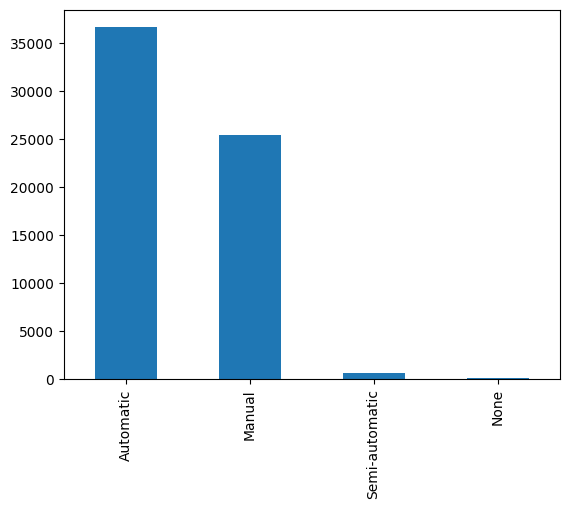

In [307]:
df.Gearbox.value_counts(dropna = False).plot.bar()

# 8 colum name : registration

In [308]:
df['registration'].value_counts()

01/2021    2883
01/2022    1284
12/2016     719
03/2021     719
12/2020     636
           ... 
05/1997       1
02/1981       1
05/1995       1
07/2028       1
10/1996       1
Name: registration, Length: 302, dtype: int64

# 10 Column name : fuel_type  
Fuel_type sütunu ile karşılaştırıldı. #Fuel_type sütunu kalacak diğer sütun silinebilir. İki sütun karşılaştırılmasında fuel_type da yer alan None değerlerin karşılığı Fuel_type sütununda electric ile eşleştiği için Fuel_type sütunundaki None değerler Electric ile doldurulacak.

In [311]:
df['fuel_type'] = df['fuel_type'].str.strip("\n\r,")
df['Fuel_type'] = df['Fuel_type'].str.strip("\n\r,")
df['fuel_type'].value_counts()


Gasoline             36942
Diesel               11754
Electric/Gasoline     8179
Electric              4906
LPG                    547
Electric/Diesel        254
CNG                     98
Hydrogen                62
Ethanol                  9
Others                   7
Automatic                5
Manual                   3
Name: fuel_type, dtype: int64

In [312]:
df[df['fuel_type'] == 'Automatic']

,Unnamed: 0,location,make,model,short_description,price,mileage,gearbox,registration,fuel_type,...,emissions_sticker,\nComfort & Convenience\n,\nEntertainment & Media\n,\nSafety & Security\n,extras,\ncolour,\nmanufacturer_color,\npaint,upholstery_colour,upholstery
21624,24444,"BREDA, NL",Mercedes-Benz,"['\n', None, '\n']",EQV 300 L2 Avantgarde 360 camera | BURMESTER |...,69,4398,"\n,08/2021,\n",NaN,Automatic,...,"\n,None,\n","[['Air conditioning', 'Armrest', 'Automatic cl...","[['Digital radio', 'Radio']]","[['ABS', 'Alarm system', 'Blind spot monitor',...","[['Alloy wheels (18"")', 'Automatically dimming...",None,None,None,None,"\n8, Full leather"
37355,42393,"GRONINGEN, NL",Citroen,"['\n', None, '\n']",Jumpy bestel 2.0 BlueHDI 180 M Driver | 19'' L...,28,4997,"\n,09/2021,\n",130 kW (177 hp),Automatic,...,"\n,None,\n","[['Air conditioning', 'Armrest', 'Automatic cl...","[['Android Auto', 'Apple CarPlay', 'Digital ra...","[['ABS', 'Adaptive Cruise Control', 'Alarm sys...","[['Alloy wheels (17"")', 'Trailer hitch', 'Voic...","\n4, Grey",None,"\npaint, Metallic",None,None
38045,43179,"URSEM, NL",Chevrolet,"['\n', None, '\n']",Silverado 1500 RST 4x4,59,56,"['\n', None, '\n']",265 kW (360 hp),Automatic,...,"\n,None,\n","[['Armrest', 'Automatic climate control, 2 zon...","[['Android Auto', 'Apple CarPlay', 'Bluetooth'...","[['ABS', 'Central door lock with remote contro...","[['Alloy wheels (20"")', 'Automatically dimming...","\n4, Red",None,None,"\nupholstery, Other","\n8, Cloth"
55759,63221,"ALPHEN AAN DEN RIJN, NL",Toyota,"['\n', None, '\n']","PROACE CITY Verso 1.2 Turbo Dynamic, Unieke Auto!",29,3,"\n,02/2022,\n",96 kW (131 hp),Automatic,...,"\n,None,\n","[['Air conditioning', 'Automatic climate contr...","[['Android Auto', 'Apple CarPlay', 'Digital ra...","[['ABS', 'Adaptive Cruise Control', 'Adaptive ...","[['Alloy wheels (17"")', 'Automatically dimming...","\n4, Silver",None,"\npaint, Metallic","\nupholstery, Black","\n8, Cloth"
55764,63227,"ALPHEN AAN DEN RIJN, NL",Toyota,"['\n', None, '\n']","PROACE CITY Verso 1.2 Turbo Dynamic, Unieke Auto!",29,3,"\n,02/2022,\n",96 kW (131 hp),Automatic,...,"\n,None,\n","[['Air conditioning', 'Automatic climate contr...","[['Android Auto', 'Apple CarPlay', 'Digital ra...","[['ABS', 'Adaptive Cruise Control', 'Adaptive ...","[['Alloy wheels (17"")', 'Automatically dimming...","\n4, Silver",None,"\npaint, Metallic","\nupholstery, Black","\n8, Cloth"


In [313]:
df.loc[(df['fuel_type'] != 'None'), ['fuel_type', 'Fuel_type']][:50]

,fuel_type,Fuel_type
0,Gasoline,Super 95
1,Gasoline,Gasoline
2,Gasoline,Gasoline
3,Gasoline,Gasoline
4,Gasoline,Super 95
5,Gasoline,Super 95
6,Gasoline,Gasoline
7,Gasoline,Gasoline
8,Gasoline,Gasoline
9,Gasoline,Super 95


# 11 Column name : power     
30 Power sütunu ile karşılaştırıldı. hp birim olarak kullanılmasının uygun olduğuna karar verildi. Birim ifadesi sütuna eklenecek.

In [241]:
df['power'] = df['power'].str.strip("\n\r,")
df['Power'] = df['Power'].str.strip("\n\r,")
df['power'] = df['power'].fillna("None")
df.loc[(df['power'] != 'None'), ['power', 'Power']]
# Integere cevirmek icin birimleri kolona alabiliriz. hp zaten kW ye bagli bi deger oldugu icin o kismi rahatlikla silebiliriz
df['Power'].value_counts() # Buyuk harfle olani almak daha mantikl olabilir
df['Power'] = df['Power'].str.extract(r'(\d+)')
df['Power'] # sutun ismini tum analizleri yaptiktan sonra degstiririz.

0        110
1         92
2         92
3         92
4        110
        ... 
62761    125
62762    103
62763    132
62764    103
62765    104
Name: Power, Length: 62766, dtype: object

# 12 Column Name : seller

In [320]:
df['seller'] = df['seller'].str.lstrip("[', [' \s\S\t n ")
df['seller'] = df['seller'].str.rstrip("[', [] ' \s\S\t n")  


#seller has three not related unique values(electric, diesel , Gasoline) 
#bunlar diger sutunlara ait olabilir
df["seller"].replace("Diesel", None, inplace = True) 
df["seller"].replace("Electric", None, inplace = True) 
df["seller"].replace("Gasoline", None, inplace = True) 
df["seller"].value_counts()

Dealer            57428
Private seller     5330
Name: seller, dtype: int64

<AxesSubplot:>

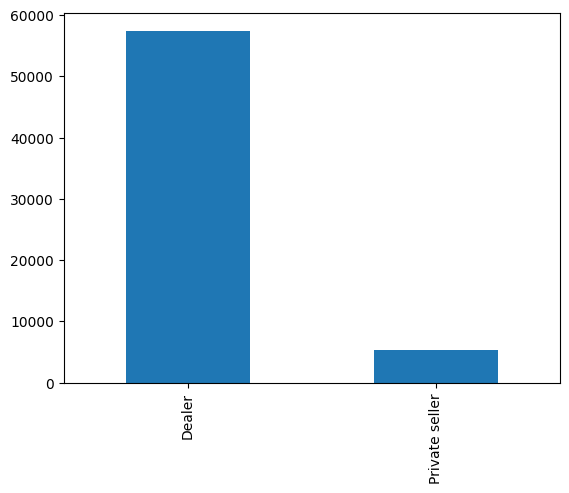

In [29]:
df.seller.value_counts(dropna = False).plot.bar()

# 13 Column name: body_type   # None değerlerin sayısı düşük  ne yapılacağına karar verilecek.

In [325]:
df['body_type'] = df['body_type'].str.replace(',', '').str.strip()
 # 948 none deger
df['body_type'] = df['body_type'].str.replace('None', 'Other')
df['body_type'].value_counts()

Off-Road/Pick-up    17348
Compact             13185
Station wagon       11318
Van                  6243
Sedan                5341
Convertible          3645
Transporter          2249
Coupe                1923
Other                1510
Panel van               2
Car transport           1
Flatbed van             1
Name: body_type, dtype: int64

# 14 Column name: type

In [326]:
df['type'] = df['type'].str.replace(',', '').str.strip()
df['type'].value_counts()# 948 none values

Used              55523
New                3413
Demonstration      1889
Pre-registered      993
None                948
Name: type, dtype: int64

<AxesSubplot:>

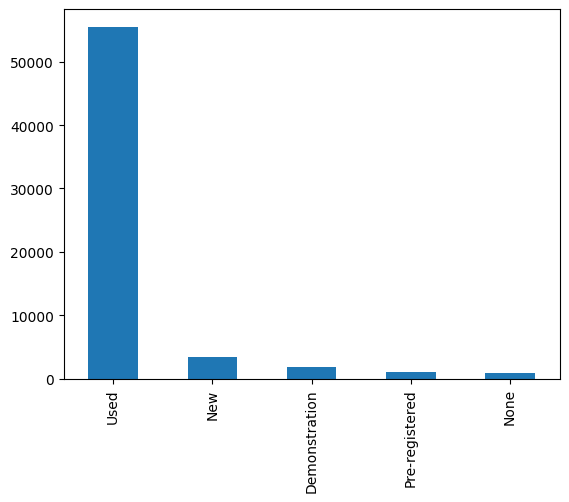

In [32]:
df.type.value_counts(dropna = False).plot.bar()

# 15 Column name: drivetrain  
 drivetrain ile ilgili literatür calismasi yapilacak. 14594 none değeri tarama sonrası değerlendirilecek. 

In [327]:
df['drivetrain'] = df['drivetrain'].str.replace(',', '').str.strip()
df['drivetrain'].value_counts() # cekis demek , 14594 none var

Front    33522
None     14594
4WD       7363
Rear      7287
Name: drivetrain, dtype: int64

<AxesSubplot:>

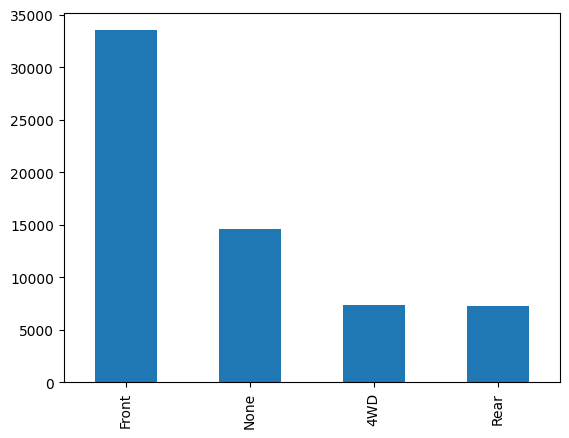

In [34]:
df.drivetrain.value_counts(dropna = False).plot.bar()

# 16 Column Name: seats   

In [328]:
df["seats"].unique()

array(['\n5', '\n4', 'None\n', '\n2', '\n6', '\n7', '\n3', '\n14', '\n9',
       '\n8', '\n1'], dtype=object)

In [329]:
df["seats"]=df["seats"].str.strip(',\n')
df["seats"]= df["seats"].replace("None", np.nan)
df["seats"] = df["seats"].astype(float).astype(pd.Int64Dtype())
#df["seats"] = pd.to_numeric(df["seats"], errors='coerce')

In [330]:
df["seats"].isna().sum()

4925

In [331]:
df["seats"].head()

0    5
1    5
2    5
3    4
4    5
Name: seats, dtype: Int64

# 17 Column Name: doors   


In [187]:
df["doors"].unique()

array(['\n3', '\n5', '\n4', 'None\n', '\n2', '\n6', '\n1'], dtype=object)

In [188]:

df["doors"]=df["doors"].str.strip(',\n')
df["doors"].replace("None", np.nan) #None values may stay as None. There are no car without door
df["doors"] = pd.to_numeric(df['doors'], errors='coerce')
df["doors"].head()


0    3.0
1    5.0
2    5.0
3    3.0
4    5.0
Name: doors, dtype: float64

In [189]:
df["doors"] = df["doors"].astype(float).astype(pd.Int64Dtype())

df["doors"].isna().sum()


1161

In [190]:
df["doors"].head()

0    3
1    5
2    5
3    3
4    5
Name: doors, dtype: Int64

<AxesSubplot:>

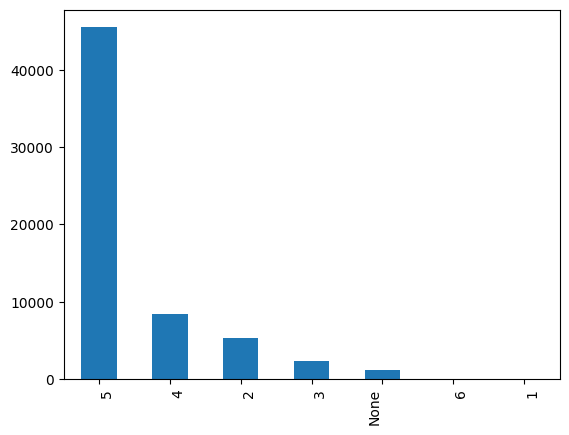

In [42]:
df.doors.value_counts(dropna = False).plot.bar()

# 18 Column Name: country_version   #54824 None değeri var. Değer çok yüksek?

In [333]:
df['country_version'] = df['country_version'].str.split(',').str[-1].str.strip()
df['country_version'].value_counts()
# 54824 none values var

None                    54824
Netherlands              6835
Germany                   772
Belgium                   106
Sweden                     50
Denmark                    36
France                     21
Czechia                    19
Spain                      16
Switzerland                14
Italy                      13
United States              13
Poland                     12
Austria                     9
Luxembourg                  6
Slovenia                    5
United Kingdom              2
Hungary                     2
Japan                       2
Canada                      2
Romania                     1
Slovakia                    1
Estonia                     1
Namibia                     1
Lithuania                   1
Latvia                      1
United Arab Emirates        1
Name: country_version, dtype: int64

In [ ]:
#df.drop("country_version", inplace=False, axis=1)

# 19 Column name : offer_number
* Literature information was reviewed at allecijfers.nl - autoweek.nl - bovag.nl - autotrader.nl. No record found. No action was taken because there was no value affecting the analysis.

In [44]:
df["offer_number"]= df["offer_number"].str.strip(',\n')
df["offer_number"].value_counts()

None        9928
NIEUW         53
XX            28
.             17
1776          13
            ... 
#38416         1
#38787         1
#38418         1
#37783         1
26-HN-LS       1
Name: offer_number, Length: 50143, dtype: int64

In [ ]:
#df.drop("offer_number", inplace=False, axis=1)

# 20 Column name : warranty # literatür taraması yapılacak. sonrasında değerlendirilecek

In [37]:
df['warranty'] = df['warranty'].str.replace(',', '').str.strip()
df['warranty'].value_counts()

warranty
None         41605
6 months     16607
3 months      1643
12 months     1362
24 months     1026
1 months       248
84 months      204
18 months       35
36 months       10
2 months         8
48 months        6
Yes              3
60 months        3
26 months        2
9 months         2
10 months        1
4 months         1
Name: count, dtype: int64

In [38]:
# Categorize the values in the column. Since 2004-2006 model 3 is data, "Yes" values are added to category1.
category1 = ['1 months', '2 months', '4 months', '3 months', '6 months', '9 months', '10 months', '12 months', '18 months', '24 months', 'Yes']
category2 = ['26 months', '36 months', '48 months', '60 months']
category3 = ['84 months']

# Let's create a column classified by categories
df['warranty_category'] = pd.cut(pd.to_numeric(df['warranty'].str.extract('(\d+)', expand=False)), 
                                  bins=[0, 37, 72, 1000], 
                                  labels=['1-3 year    :', '3-6 year    :', 'Over 6 years:'])

df['warranty_category'].value_counts()

warranty_category
1-3 year    :    20945
Over 6 years:      204
3-6 year    :        9
Name: count, dtype: int64

# 21 Column name : Mileage    #Data içinde 2 adet Mileage sütunu mevcut ve bu sütunda bilgi olmadığından drop yapılacak

In [46]:
df['Mileage'].unique()

array(["[['\\n'], ['']]", "[['\\n'], ['None']]"], dtype=object)

In [ ]:
#df.drop("Mileage", inplace=False, axis=1)

# 22 Column name: first_registration  ve #9 column name : registration birbiri ile uyumlu kontrol sağlanıp bir sütun drop yapılacak.

In [335]:
df['first_registration'].value_counts()


01/2021    2883
01/2022    1284
12/2016     719
03/2021     719
12/2020     636
           ... 
04/1997       1
07/1998       1
04/1999       1
05/1997       1
10/1996       1
Name: first_registration, Length: 298, dtype: int64

# 23 Column Name : production_date  ve 9 Column name :registration değerleri birbiri ile uyumlu bundan dolayı none değerleri registirationdaki değerler ile dolduruldu.

In [48]:
# df['production_date'] = pd.to_datetime(df['production_date'], format='%Y')

#Producton_date ve registration arasinda bag var. Yillar ayni. Burdan doldurabiliriz
df['production_date'] = df['production_date'].fillna("None")
df.loc[(df['production_date'] != 'None'), ['production_date', 'registration']]


,production_date,registration
2,2015,06/2015
7,2011,07/2011
8,2012,08/2012
14,2012,05/2012
26,2013,07/2013
...,...,...
62696,2007,03/2007
62708,2010,09/2010
62714,2007,07/2007
62719,2005,02/2005


# 24 Column Name : general_inspection #15532 new değeri mevcut. New Değerleri 2023 olarak doldurulacak.

In [339]:

df['general_inspection'] = df['general_inspection'].str.replace('New', '01/2023')
#df["general_inspection"].unique()
df["general_inspection"].value_counts()

01/2023    16314
None       15038
06/2022     2169
03/2022     2025
07/2022     1936
           ...  
11/2014        1
09/2017        1
08/2018        1
06/2019        1
12/2019        1
Name: general_inspection, Length: 93, dtype: int64

# 25 Column Name : last_service               #column içerisinde sadece nan değeri var. Drop yapılacak. Kalıcı silme olmayacak.

In [340]:
df['last_service'].unique()

array(['None'], dtype=object)

In [ ]:
#df.drop("last_service", inplace=False, axis=1)

# 26 Column Name: full_service_history  #dtype int cevrilecek. 0 ve 1 olarak değiştirilecek.

In [343]:
df['full_service_history'] = df['full_service_history'].str.replace(',', '').str.strip()
df['full_service_history'].value_counts()


Yes     43101
None    19665
Name: full_service_history, dtype: int64

#  full_service_encoded sütununda değerler 1-0 olarak yazıldı. 

In [344]:
from sklearn.preprocessing import LabelEncoder          
lbe=LabelEncoder()
lbe.fit_transform(df["full_service_history"])

df['full_service_encoded']=lbe.fit_transform(df["full_service_history"])
df['full_service_encoded']

0        1
1        1
2        1
3        1
4        1
        ..
62761    1
62762    1
62763    1
62764    0
62765    0
Name: full_service_encoded, Length: 62766, dtype: int32

# 27 Column Name : non_smoker_vehicle #dtype int cevrilecek. 0 ve 1 olarak değiştirilecek.

In [346]:
df['non_smoker_vehicle'] = df['non_smoker_vehicle'].str.replace(',', '').str.strip()
df['non_smoker_vehicle'].value_counts()

None    57769
Yes      4997
Name: non_smoker_vehicle, dtype: int64

# non_smoker_encoded sütununda değerler 1-0 olarak yazıldı. 

In [347]:
lbe.fit_transform(df["non_smoker_vehicle"])

array([0, 0, 1, ..., 0, 0, 0])

In [348]:
df['non_smoker_encoded']=lbe.fit_transform(df["non_smoker_vehicle"])
df['non_smoker_encoded']

0        0
1        0
2        1
3        0
4        0
        ..
62761    0
62762    0
62763    0
62764    0
62765    0
Name: non_smoker_encoded, Length: 62766, dtype: int32

# 28 Column Name : previous_owner

In [350]:
df['previous_owner'] = df['previous_owner'].str.lstrip("[' \s\S\t n ',]")
df['previous_owner'] = df['previous_owner'].str.rstrip("['\s,]")
df['previous_owner'].value_counts()

None    58373
1        2694
2        1157
3         351
4         121
5          39
6          14
7           7
8           6
9           2
12          1
10          1
Name: previous_owner, dtype: int64

# 29 Column Name : last_timing_belt_change  # 61925 None değeri hic degismedigi anlamina geldigi icin production date ile doldurulması düşünüldü.

In [28]:
df['last_timing_belt_change'] = df['last_timing_belt_change'].str.lstrip(" [',] '\a \s\S\t\r n ' ")
df['last_timing_belt_change'] = df['last_timing_belt_change'].str.rstrip(" [',] '\a \s\S\t\r n ' ")

df['last_timing_belt_change'].unique()
df['last_timing_belt_change'].value_counts()

last_timing_belt_change
None       61925
06/2021       41
05/2021       31
10/2021       31
09/2021       28
           ...  
02/2015        1
04/2016        1
06/2014        1
04/2015        1
11/2015        1
Name: count, Length: 82, dtype: int64

# Fakat karşılaştırma yapıldığında first registration tarihinde eski tarihler de olduğu görüldü ve bu işlemin doğru olmayacağına karar verildi.

In [34]:
df.loc[(df['last_timing_belt_change'] == 'None'), ['last_timing_belt_change', 'first_registration']][:30]

,last_timing_belt_change,first_registration
0,None,08/2003
1,None,10/2013
2,None,06/2015
3,None,10/2015
4,None,10/2017
5,None,03/2019
6,None,03/2014
7,None,07/2011
8,None,08/2012
9,None,01/2011


In [35]:
df['last_timing_belt_change'].isnull().sum()

0

# 30 Column Name : Power bu sutun duplicate oldugu icin siliyoruz

In [352]:
df["Power"].value_counts()

\n,None,\n               5330
\n,110 kW (150 hp),\n    3677
\n,88 kW (120 hp),\n     2518
\n,100 kW (136 hp),\n    2190
\n,90 kW (122 hp),\n     2175
                         ... 
\n,164 kW (223 hp),\n       1
\n,237 kW (322 hp),\n       1
\n,37 kW (50 hp),\n         1
\n,13 kW (18 hp),\n         1
\n,10 kW (14 hp),\n         1
Name: Power, Length: 357, dtype: int64

In [353]:
df["power"].value_counts()

[None, '']          5333
110 kW (150 hp),    3677
88 kW (120 hp),     2518
100 kW (136 hp),    2190
90 kW (122 hp),     2174
                    ... 
378 kW (514 hp),       1
282 kW (383 hp),       1
470 kW (639 hp),       1
451 kW (613 hp),       1
10 kW (14 hp),         1
Name: power, Length: 361, dtype: int64

# 31 Column Name: Gearbox   aynı sütundan var

# 32 Column Name : engine_size   
 dtype int e cevrilecek. 5143 None değeri var
 99 '0' cc degeri var. 
none cevirme kodunu düzenleyince 0 degrlerden none ekleniyor.
df["engine_size"].replace(0, np.nan, inplace=True)

In [356]:
# Edit to include numbers only
df['engine_size'] = df['engine_size'].replace({'[^0-9]':''}, regex=True)

# Change empty data to NaN
df['engine_size'] = df['engine_size'].replace('', np.nan)

df['engine_size'].value_counts()

1598    4339
1998    2633
1199    2252
999     2241
1395    2077
        ... 
1982       1
3596       1
2          1
3604       1
200        1
Name: engine_size, Length: 445, dtype: int64

In [17]:
df["engine_size"] = df["engine_size"].astype(int)
df["engine_size"].head()

#df["engine_size"].isna().sum()

ValueError: invalid literal for int() with base 10: '\n,1,984 cc,\n'

# 33 Column Name : gears  # 18184 none degeri var literatür arastirmasi yapilacak  

In [358]:
df["gears"]=df["gears"].str.strip(',\n,')
df["gears"].unique()
df["gears"].value_counts()

6       18882
None    18184
5       10834
7        6867
8        4905
1        1547
9         881
4         621
2          37
3           8
Name: gears, dtype: int64

bi iki koda gerek var mi pek emin degilim,
Data missing de konusabiliriz!!!
df["gears"].replace("None", "0", inplace = True)
df["gears"]=df["gears"].astype(int)

# 34 Column Name: cylinders  5532 None değeri var

none degerler mode ile doldurulabilir. medyan ve mode degrelri cok yakin, yada none olarak kalablr.
df["cylinders"]= df["cylinders"].fillna(df["cylinders"].mode()[0])

In [359]:
df["cylinders"]=df["cylinders"].str.strip(',\n,')
df["cylinders"].unique()
df["cylinders"].value_counts()

4       41993
3        7664
None     5532
6        4260
5        1390
8         937
1         498
2         400
10         65
12         26
7           1
Name: cylinders, dtype: int64

In [64]:
df["cylinders"] = pd.to_numeric(df["cylinders"], errors='coerce')
df["cylinders"].isna().sum()
#df["cylinders"].mode()

5532

#  35 Column Name : empty_weight

In [364]:
df_origin["empty_weight"].head()

0    \n,1,280 kg,\n
1    \n,1,200 kg,\n
2        \n,None,\n
3    \n,1,105 kg,\n
4    \n,1,215 kg,\n
Name: empty_weight, dtype: object

In [360]:
df["empty_weight"]=df["empty_weight"].str.strip('[\n,')
df["empty_weight"]=df["empty_weight"].str.replace(' kg', '').str.replace(',', '')
df["empty_weight"].head()

0    1280
1    1200
2    None
3    1105
4    1215
Name: empty_weight, dtype: object

In [365]:
df["empty_weight"] = df["empty_weight"].replace('None' , np.nan)
df["empty_weight"] = df["empty_weight"].astype(float).astype(pd.Int64Dtype())

df["empty_weight"].isna().sum()

1407

In [366]:
df["empty_weight"].head()

0    1280
1    1200
2    <NA>
3    1105
4    1215
Name: empty_weight, dtype: Int64

# 36 Column Name: Fuel_type

In [367]:
df["Fuel_type"]=df["Fuel_type"].str.strip('[\n,')
df["Fuel_type"].head(15)

0     Super 95
1     Gasoline
2     Gasoline
3     Gasoline
4     Super 95
5     Super 95
6     Gasoline
7     Gasoline
8     Gasoline
9     Super 95
10    Gasoline
11    Super 95
12    Gasoline
13    Super 95
14    Gasoline
Name: Fuel_type, dtype: object

# 37 Column name : fuel_consumption # city ve country sütunlari olusturulacak.

In [19]:
df['fuel_consumption'] = df['fuel_consumption'].str.lstrip(" [', \s\S\t\r\n,n ' ")
df['fuel_consumption'] = df['fuel_consumption'].str.rstrip("[', '] \s\S\t\r\n,\\n  ")
df['fuel_consumption'] = df['fuel_consumption'].str.replace("'","")
df['fuel_consumption']

0                                                     None
1                                     4.9 l/100 km (comb.)
2        0 l/100 km (comb.), 0 l/100 km (city), 0 l/100...
3        4.8 l/100 km (comb.), 5.9 l/100 km (city), 4.2...
4        5 l/100 km (comb.), 6.2 l/100 km (city), 4.3 l...
                               ...                        
62761                                                 None
62762                                                 None
62763    9.1 l/100 km (comb.), 12.6 l/100 km (city), 7 ...
62764                                                 None
62765    8.4 l/100 km (comb.), 11.6 l/100 km (city), 6....
Name: fuel_consumption, Length: 62766, dtype: object

# create fuel_cons_comb column

In [20]:
df['fuel_cons_comb'] = df['fuel_consumption'].str.split(',').str.get(0)
df['fuel_cons_comb'].head()

0                    None
1    4.9 l/100 km (comb.)
2      0 l/100 km (comb.)
3    4.8 l/100 km (comb.)
4      5 l/100 km (comb.)
Name: fuel_cons_comb, dtype: object

In [21]:
df['fuel_cons_comb'] = df['fuel_cons_comb'].str.replace("l/100 km (comb.)","")
df["fuel_cons_comb"]

0        None
1        4.9 
2          0 
3        4.8 
4          5 
         ... 
62761    None
62762    None
62763    9.1 
62764    None
62765    8.4 
Name: fuel_cons_comb, Length: 62766, dtype: object

# create fuel_cons_city column

In [22]:
df['fuel_cons_city'] = df['fuel_consumption'].str.split(',').str.get(1)
df['fuel_cons_city'].head()

0                     NaN
1                     NaN
2       0 l/100 km (city)
3     5.9 l/100 km (city)
4     6.2 l/100 km (city)
Name: fuel_cons_city, dtype: object

In [23]:
df['fuel_cons_city'] = df['fuel_cons_city'].str.replace("l/100 km (city)","")
df["fuel_cons_city"].head()

0      NaN
1      NaN
2       0 
3     5.9 
4     6.2 
Name: fuel_cons_city, dtype: object

# create fuel_cons_country column

In [24]:
df['fuel_cons_country'] = df['fuel_consumption'].str.split(',').str.get(2)
df['fuel_cons_country'].head()

0                        NaN
1                        NaN
2       0 l/100 km (country)
3     4.2 l/100 km (country)
4     4.3 l/100 km (country)
Name: fuel_cons_country, dtype: object

In [25]:
df['fuel_cons_country'] = df['fuel_cons_country'].str.replace("l/100 km (country)","")
df["fuel_cons_country"].head() 

0      NaN
1      NaN
2       0 
3     4.2 
4     4.3 
Name: fuel_cons_country, dtype: object

# 38 Column Name: co2_emissions

In [26]:
df['co2_emissions'] = df['co2_emissions'].str.strip(",\n")
df["co2_emissions"] = df["co2_emissions"].str.rstrip(" [',] \s\S\t\r\n n' ")
df["co2_emissions"] = df["co2_emissions"].str.lstrip(" [', \s\S\t\r\n ' ")
df['co2_emissions'].value_counts()


co2_emissions
None                9867
                    6887
0 g/km (comb.)      4973
139 g/km (comb.)    1061
149 g/km (comb.)     911
                    ... 
392 g/km (comb.)       1
378 g/km (comb.)       1
24 g/km (comb.)        1
55 g/km (comb.)        1
70 g/km (comb.)        1
Name: count, Length: 346, dtype: int64

# 39 Column Name : emission_class  #literatür incelenecek ve euro 6 için euro 6 c veya euro6d olup olmadığı araştırılacak eğer yoksa euro 6c ve 6d değerleri Euro 6 şeklinde düzenlenecek

Literatür taraması sonrası Euro 6b - Euro 6c ve Euro 6d-TEMP değerlerinin olduğu görüldü.

In [71]:
#df['emission_class'] = df['emission_class'].apply(lambda x:  re.sub(r'[^\W].,]+', '', x).replace(',', '.').replace('.', '', 1))
df['emission_class'] = df['emission_class'].str.strip(",\n")
df['emission_class'].value_counts()

Euro 6                           19704
None                             19076
Euro 5                           10675
Euro 4                            7710
Euro 6d-TEMP                      2675
Euro 3                            1702
['\n', [' ', ' ', ' '], '\n']      597
Euro 1                             461
Euro 2                             129
Euro 6c                             20
Euro 6d                             17
Name: emission_class, dtype: int64

# 40 Column Name: emissions_sticker          #drop yapıldı.

 #Literatür taraması sonrasında avrupada emission_sticker kullanmanın zorunlu olduğu bilgisine ulaşıldı. Fakat arabaların yüksek oranda yani arabalar olmasından dolayı henüz arabalara ait emission_sticker oranları yüksek değil. Bunun için drop yapılacak.

In [72]:
df["emissions_sticker"].unique()

array(['\n,None,\n', '\n,4 (Green),\n', '\n,3 (Yellow),\n',
       '\n,1 (No sticker),\n', "['\\n', [' ', ' ', ' '], '\\n']",
       '\n,2 (Red),\n'], dtype=object)

In [73]:
df["emissions_sticker"] = df["emissions_sticker"].str.rstrip(" [',] \s\S\t\r\n ' ")
df["emissions_sticker"] = df["emissions_sticker"].str.lstrip(" [',] \s\S\t\r\n ' ")
df["emissions_sticker"] = df["emissions_sticker"].str.strip(",")
df["emissions_sticker"] = df["emissions_sticker"].str.replace("n","None")
df["emissions_sticker"].value_counts()

NoNonee                           62632
4 (GreeNone)                        106
1 (No sticker)                       12
None', [' ', ' ', ' '], '\None       11
3 (Yellow)                            4
2 (Red)                               1
Name: emissions_sticker, dtype: int64

In [74]:
df.drop("emissions_sticker", inplace=False, axis=1)

,Unnamed: 0,location,make,model,short_description,price,mileage(km),gearbox,registration,fuel_type,...,\nEntertainment & Media\n,\nSafety & Security\n,extras,\ncolour,\nmanufacturer_color,\npaint,upholstery_colour,upholstery,full_service_encoded,non_smoker_encoded
0,0,"LOON OP ZAND,NL",Audi,A3,2.0 FSI Ambition Pro Line,4,NaN,Automatic,08/2003,Gasoline,...,"[['CD player', 'Radio']]","[['ABS', 'Alarm system', 'Central door lock', ...",[['Alloy wheels']],"\n4, Grey",None,"\npaint, Metallic","\nupholstery, Black","\n8, Cloth",1,0
1,1,"HEERLEN,NL",Audi,A3,Sportback 1.4 TFSI Ambiente/ECC/PDC//Lichtmeta...,12,NaN,Automatic,10/2013,Gasoline,...,"[['CD player', 'Radio']]","[['Alarm system', 'Central door lock', 'Centra...","[['Alloy wheels (16"")']]","\n4, White",None,None,"\nupholstery, Black","\n8, Cloth",1,0
2,3,"BAARLENASSAU,NL",Audi,A1,1.4 TFSI Sportback Pro-Line Aut. S-Tronic Navi.,12,NaN,Automatic,06/2015,Gasoline,...,"[['Bluetooth', 'CD player', 'On-board computer...","[['ABS', 'Central door lock with remote contro...","[['Alloy wheels (15"")']]","\n4, Grey",None,"\npaint, Metallic",None,None,1,1
3,4,"ZUTPHEN,NL",Audi,A1,S-Line | Automaat | Navigatie | Cruise-/Climat...,14,NaN,Automatic,10/2015,Gasoline,...,"[['CD player', 'MP3', 'On-board computer', 'Ra...","[['ABS', 'Alarm system', 'Bi-Xenon headlights'...","[['Alloy wheels (17"")', 'Shift paddles', 'Spor...","\n4, Black",None,None,"\nupholstery, Black","\n8, Part leather",1,0
4,7,"BERGEN, NL",Audi,A3,Sportback 1.5 TFSI Sport | Dealer Onderhouden ...,24,NaN,Automatic,10/2017,Gasoline,...,"[['CD player', 'On-board computer', 'Radio']]","[['ABS', 'Alarm system', 'Bi-Xenon headlights'...","[['Alloy wheels (17"")', 'Sport seats', 'Sport ...","\n4, Grey",None,"\npaint, Metallic","\nupholstery, Black","\n8, Cloth",1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62761,71098,"ETTENLEUR,NL",Volvo,S60,2.4 Edition APK/LMV/Airco,1,NaN,Manual,12/2000,LPG,...,"[['CD player', 'On-board computer', 'Radio']]","[['ABS', 'Central door lock', 'Central door lo...","[['Alloy wheels (15"")']]","\n4, Black",None,None,None,None,1,0
62762,71099,"HENDRIKIDOAMBACHT,NL",Volvo,S60,2.4 Kinetic LPG-G3 NAP/LEER/NAVI/DAK/NW APK,1,NaN,Manual,02/2005,LPG,...,"[['CD player', 'On-board computer', 'Radio']]","[['ABS', 'Central door lock', 'Central door lo...","[['Alloy wheels (15"")']]","\n4, Blue",None,None,None,"\n8, Part leather",1,0
62763,71101,"LELYSTAD,NL",Volvo,S60,"2.0T Edition,1e Eigenaar,LPG G3,Onderbouw,Navi...",3,NaN,Manual,08/2004,LPG,...,[['On-board computer']],"[['ABS', 'Central door lock', 'Central door lo...","[['Alloy wheels (17"")', 'Automatically dimming...","\n4, Black",None,"\npaint, Metallic",None,"\n8, Part leather",1,0
62764,71102,"AMSTERDAM,NL",Volvo,S40,2.4,1,NaN,Manual,01/2004,LPG,...,"[['CD player', 'On-board computer', 'Radio']]","[['ABS', 'Central door lock with remote contro...","[['Alloy wheels (16"")', 'Automatically dimming...","\n4, Beige",None,"\npaint, Metallic","\nupholstery, Beige","\n8, Velour",0,0


# 41 Column Name : Comfort & Convenience   #Air Conditioning -Cruise control sütunları oluşturulacak ve 0-1 şeklinde düzenlenecek.

In [385]:
df.rename({"\nComfort & Convenience\n":"comfort_convenience"}, inplace = True, axis = 1) # sütun isminde \n değerleri olduğu için kalıcı oalrak sütun ismi değiştirildi.
df["comfort_convenience"] = df["comfort_convenience"].str.rstrip(" [', \s\S\t\r n ' ")
df["comfort_convenience"] = df["comfort_convenience"].str.lstrip(" [', '\a \s\S\t\r n ' ")
df["comfort_convenience"] = df["comfort_convenience"].str.replace("'","")
df["comfort_convenience"].unique()

array(['Air conditioning, Armrest, Automatic climate control, Electrical side mirrors, Navigation system, Power windows, Sunroof]]',
       'Air conditioning, Automatic climate control, Electrical side mirrors, Light sensor, Power windows, Rain sensor]]',
       'Air conditioning, Armrest, Automatic climate control, Cruise control, Navigation system, Parking assist system sensors rear, Power windows, Rain sensor, Seat heating, Split rear seats]]',
       ...,
       'Air conditioning, Automatic climate control, Cruise control, Electrical side mirrors, Electrically adjustable seats, Leather steering wheel, Parking assist system sensors rear, Rain sensor, Seat heating]]',
       'Air conditioning, Automatic climate control, Cruise control, Electrical side mirrors, Leather steering wheel, Parking assist system sensors rear, Power windows, Rain sensor, Sunroof]]',
       'Air conditioning, Automatic climate control, Cruise control, Electrical side mirrors, Leather steering wheel, Navigatio

# air_conditioning Sütunu oluşturuldu ve 1-0 şeklinde dolduruldu.

In [386]:


df['air_conditioning'] = df['comfort_convenience'].str.split(',').str.get(0)

df['air_conditioning'].head()

#df['air_conditioning1'] = df['air_conditioning1'].fillna("None")
#df.loc[(df['air_conditioning1'] != 'None'), ['air_conditioning1', 'air_conditioning']]

0    Air conditioning
1    Air conditioning
2    Air conditioning
3    Air conditioning
4    Air conditioning
Name: air_conditioning, dtype: object

In [387]:
lbe.fit_transform(df["air_conditioning"])

array([1, 1, 1, ..., 1, 1, 1])

In [388]:
df['air_conditioning']=lbe.fit_transform(df["air_conditioning"])
df['air_conditioning'].head()

0    1
1    1
2    1
3    1
4    1
Name: air_conditioning, dtype: int32

# cruise_control değeri sütun içinde farklı sıralamada yer almasından dolayı kaçıncı değerde yer aldığı incelendi.

In [389]:
search_value = 'Cruise control'

# sütunun içinde arama yaparak ilgili satırları seçmek
search_result = df[df['comfort_convenience'].str.contains(search_value)]

# arama sonucunu yazdırmak
if not search_result.empty:
    print(f"Aradığınız sayı ({search_value}) veri kümesinde yer alan satırlarda mevcut:")
    print(search_result)
else:
    print(f"Aradığınız sayı ({search_value}) veri kümesinde yer alan satırlarda bulunamadı.")

Aradığınız sayı (Cruise control) veri kümesinde yer alan satırlarda mevcut:
       Unnamed: 0                 location    make model  \
2               3        BAARLE-NASSAU, NL   Audi     A1   
3               4              ZUTPHEN, NL   Audi     A1   
5               8                WEZEP, NL   Audi     A3   
7              10               HEESCH, NL   Audi     A3   
9              12          NIJKERK GLD, NL   Audi     A3   
...           ...                      ...     ...   ...   
62760       71097              KLIMMEN, NL  Volvo    S40   
62761       71098           Etten-Leur, NL  Volvo    S60   
62762       71099  HENDRIK-IDO-AMBACHT, NL  Volvo    S60   
62763       71101             LELYSTAD, NL  Volvo    S60   
62765       71103          SOESTERBERG, NL  Volvo    S60   

                                       short_description  price  mileage  \
2        1.4 TFSI Sportback Pro-Line Aut. S-Tronic Navi.     12   145102   
3      S-Line | Automaat | Navigatie | Cruise-/Clim

Listenin 1. indexinde 3876 satırda mevcut

In [ ]:
df['cruise_control'] = df['comfort_convenience'].str.split(',').str.get(1)

df['cruise_control'].value_counts()

cruise_control
 Armrest                                41101
 Automatic climate control              10508
 Cruise control                          3876
 Air suspension                          2313
 Electrical side mirrors                 2282
                                        ...  
 Seat ventilation]]                         1
 Electrically heated windshield]]           1
 Parking assist system self-steering        1
 Keyless central door lock]]                1
 Electrically adjustable seats]]            1
Name: count, Length: 63, dtype: int64

Listenin 2. indexinde 12999 satırda mevcut

In [390]:
df['cruise_control'] = df['comfort_convenience'].str.split(',').str.get(2)

#df['cruise_control'].value_counts()

Listenin 3. indexinde 31690 satırda mevcut

In [391]:
df['cruise_control'] = df['comfort_convenience'].str.split(',').str.get(3)

#df['cruise_control'].value_counts()

Listenin 4. indexinde 4106 satırda mevcut

In [392]:
df['cruise_control'] = df['comfort_convenience'].str.split(',').str.get(4)

#df['cruise_control'].value_counts()

# 42 Column Name : Entertaiment & Media  #Bluetooth sütunu oluşturulacak 0 ve 1 şeklinde düzenlenecek. 

Bluetooth içeriği çok az olduğundan tekrar değerlendirme yapılacak.

In [395]:
df['\nEntertainment & Media\n'].unique()

KeyError: '\nEntertainment & Media\n'

In [396]:
df.rename({"\nEntertainment & Media\n":"entertainment_media"},inplace = True, axis = 1)# sütun isminde \n değerleri olduğu için kalıcı oalrak sütun ismi değiştirildi.
df["entertainment_media"] = df["entertainment_media"].str.rstrip(" [',] \s\S\t\r n ' ")
df["entertainment_media"] = df["entertainment_media"].str.lstrip(" [', '\a \s\S\t\r n ' ")
df["entertainment_media"] =  df["entertainment_media"].str.replace("'","")
df["entertainment_media"].unique()

array(['CD player, Radio', 'Bluetooth, CD player, On-board computer, USB',
       'CD player, MP3, On-board computer, Radio', ...,
       'Apple CarPlay, CD player, Digital cockpit, On-board computer, Radio',
       'Apple CarPlay, CD player, On-board computer, Radio, Sound system',
       'Android Auto, Apple CarPlay, Bluetooth, CD player, Digital cockpit, Digital radio, Hands-free equipment, Induction charging for smartphones, Integrated music streaming, On-board computer, Radio, Sound system, USB'],
      dtype=object)

In [397]:
search_value = 'Bluetooth'

# sütunun içinde arama yaparak ilgili satırları seçmek
search_result = df[df['entertainment_media'].str.contains(search_value)]

# arama sonucunu yazdırmak
if not search_result.empty:
    print(f"Aradığınız sayı ({search_value}) veri kümesinde yer alan satırlarda mevcut:")
    print(search_result)
else:
    print(f"Aradığınız sayı ({search_value}) veri kümesinde yer alan satırlarda bulunamadı.")

Aradığınız sayı (Bluetooth) veri kümesinde yer alan satırlarda mevcut:
       Unnamed: 0                    location    make model  \
2               3           BAARLE-NASSAU, NL   Audi     A1   
7              10                  HEESCH, NL   Audi     A3   
8              11  VALKENBURG AAN DE GEUL, NL   Audi     A1   
17             22               Oldenzaal, NL   Audi     A5   
20             26              Ridderkerk, NL   Audi     A3   
...           ...                         ...     ...   ...   
62691       71023                Enschede, NL  Volvo    V60   
62708       71042              LOENEN GLD, NL  Volvo    V70   
62714       71048                 HENGELO, NL  Volvo    V70   
62728       71064                   ASSEN, NL  Volvo    V70   
62755       71092                  Zetten, NL  Volvo    S80   

                                       short_description  price  mileage  \
2        1.4 TFSI Sportback Pro-Line Aut. S-Tronic Navi.     12   145102   
7             1.8 TF

In [398]:
df['bluetooth'] = df['entertainment_media'].str.split(',').str.get(0)

df['bluetooth'].head()

0    CD player
1    CD player
2    Bluetooth
3    CD player
4    CD player
Name: bluetooth, dtype: object

# 43 Column Name : Safety & Security

In [400]:
df["\nSafety & Security\n"]

0        [['ABS', 'Alarm system', 'Central door lock', ...
1        [['Alarm system', 'Central door lock', 'Centra...
2        [['ABS', 'Central door lock with remote contro...
3        [['ABS', 'Alarm system', 'Bi-Xenon headlights'...
4        [['ABS', 'Alarm system', 'Bi-Xenon headlights'...
                               ...                        
62761    [['ABS', 'Central door lock', 'Central door lo...
62762    [['ABS', 'Central door lock', 'Central door lo...
62763    [['ABS', 'Central door lock', 'Central door lo...
62764    [['ABS', 'Central door lock with remote contro...
62765    [['ABS', 'Alarm system', 'Central door lock', ...
Name: \nSafety & Security\n, Length: 62766, dtype: object

In [401]:
df.rename({"\nSafety & Security\n":"safety_security"},inplace = True, axis = 1)# sütun isminde \n değerleri olduğu için kalıcı oalrak sütun ismi değiştirildi.
df["safety_security"] = df["safety_security"].str.rstrip(" [', \s\S\t\r n ' ")
df["safety_security"] = df["safety_security"].str.lstrip(" [', '\a \s\S\t\r n ' ")
df["safety_security"] =  df["safety_security"].str.replace("'","")
df["safety_security"].unique()


array(['ABS, Alarm system, Central door lock, Central door lock with remote control, Driver-side airbag, Electronic stability control, Fog lights, Head airbag, Immobilizer, Passenger-side airbag, Power steering, Side airbag, Traction contro]]',
       'Alarm system, Central door lock, Central door lock with remote control, Fog lights, Immobilizer]]',
       'ABS, Central door lock with remote control, Driver-side airbag, Electronic stability control, Fog lights, Head airbag, Immobilizer, Passenger-side airbag, Power steering, Side airbag, Tire pressure monitoring system, Traction contro]]',
       ...,
       'ABS, Adaptive headlights, Alarm system, Bi-Xenon headlights, Central door lock with remote control, Daytime running lights, Driver-side airbag, Electronic stability control, Fog lights, Head airbag, Isofix, Passenger-side airbag, Power steering, Rear airbag, Side airbag, Traction contro]]',
       'ABS, Central door lock with remote control, Driver-side airbag, Electronic stabili

In [402]:
search_value = 'ABS'

# sütunun içinde arama yaparak ilgili satırları seçmek
search_result = df[df['safety_security'].str.contains(search_value)]

# arama sonucunu yazdırmak
if not search_result.empty:
    print(f"Aradığınız sayı ({search_value}) veri kümesinde yer alan satırlarda mevcut:")
    print(search_result)
else:
    print(f"Aradığınız sayı ({search_value}) veri kümesinde yer alan satırlarda bulunamadı.")

Aradığınız sayı (ABS) veri kümesinde yer alan satırlarda mevcut:
       Unnamed: 0                 location    make model  \
0               0         LOON OP ZAND, NL   Audi     A3   
2               3        BAARLE-NASSAU, NL   Audi     A1   
3               4              ZUTPHEN, NL   Audi     A1   
4               7          HAAKSBERGEN, NL   Audi     A3   
5               8                WEZEP, NL   Audi     A3   
...           ...                      ...     ...   ...   
62761       71098           Etten-Leur, NL  Volvo    S60   
62762       71099  HENDRIK-IDO-AMBACHT, NL  Volvo    S60   
62763       71101             LELYSTAD, NL  Volvo    S60   
62764       71102            Amsterdam, NL  Volvo    S40   
62765       71103          SOESTERBERG, NL  Volvo    S60   

                                       short_description  price  mileage  \
0                              2.0 FSI Ambition Pro Line      4   191066   
2        1.4 TFSI Sportback Pro-Line Aut. S-Tronic Navi.     1

# abs_encoded Sütunu oluşturuldu ve sütundaki değerler 1-0 olarak yazırılmaya çalışıldı ama 1 ve 0 olması gerekirken farklı sayılar çıktı   :) 

In [403]:
df['abs_encoded'] = df['safety_security'].str.split(',').str.get(0)

df['abs_encoded'].head()

0             ABS
1    Alarm system
2             ABS
3             ABS
4             ABS
Name: abs_encoded, dtype: object

In [404]:
from sklearn.preprocessing import LabelEncoder
lbe = LabelEncoder()

In [405]:
lbe.fit_transform(df["abs_encoded"])

array([0, 5, 0, ..., 0, 0, 0])

In [406]:
df["safety_security"] = df["safety_security"].str.rstrip(" [', ] \s\S\t\r n ' ")
df["safety_security"] = df["safety_security"].str.lstrip(" [', '\a \s\S\t\r n ' ")
df['abs_encoded'] = df['safety_security'].str.split(',').str.get(0)

df['abs_encoded'].head(25)
df['abs_encoded']=lbe.fit_transform(df["abs_encoded"])
#df['abs_encoded'].unique()
df['abs_encoded']

0        1
1        5
2        1
3        1
4        1
        ..
62761    1
62762    1
62763    1
62764    1
62765    1
Name: abs_encoded, Length: 62766, dtype: int32

# 44 Column Name : extras

In [407]:
df["extras"] = df["extras"].str.rstrip(" [',] \s\S\t\r n ' ")
df["extras"] = df["extras"].str.lstrip(" [',] '\a \s\S\t\r n ' ")
df["extras"] =  df["extras"].str.replace("'","")
df["extras"].isnull().sum()

0

# 45 Column Name: manifacturer_colour    içeriği tamamen nan değeriyle dolu bundan dolayı drop uygulandı

In [178]:
df['\nmanufacturer_color'].unique()

array([nan])

In [179]:
df = df.drop('\nmanufacturer_color', axis=1) 

# 46 Column Name: colour

In [410]:
df.rename(columns = {'\ncolour':'colour'}, inplace = True)
df["colour"].unique()

array(['\n4, Grey', '\n4, White', '\n4, Black', '\n4, Red', '\n4, Silver',
       '\n4, Brown', '\n4, Blue', '\n4, Violet', 'None', '\n4, Beige',
       '\n4, Yellow', '\n4, Green', '\n4, Orange', '\n4, Bronze',
       '\n4, Gold'], dtype=object)

In [415]:
df["colour"]=df["colour"].str.strip(',\n4,')
df["colour"].value_counts()
#1048 none var

 Grey      20667
 Black     16003
 White      8922
 Blue       7828
 Red        2829
 Brown      1721
 Silver     1614
None        1048
 Green       781
 Beige       517
 Orange      334
 Yellow      266
 Violet      151
 Gold         50
 Bronze       35
Name: colour, dtype: int64

# 47 Column Name : paint   (arabanın boyanıp boyanmadığını ifade ediyor. Renk belirtilenler boyanmış belirtilmeyenler boyanmamış. Bundan dolayı rengin yanındaki paint ifadesini gözardı edebiliriz.)

In [ ]:
df.rename(columns = {'\npaint':'paint'}, inplace = True)
df["paint"].unique()
df['paint']


0        \npaint, Metallic
1                      NaN
2        \npaint, Metallic
3                      NaN
4        \npaint, Metallic
               ...        
62761                  NaN
62762                  NaN
62763    \npaint, Metallic
62764    \npaint, Metallic
62765    \npaint, Metallic
Name: paint, Length: 62766, dtype: object

In [ ]:
df["paint"]=df["paint"].str.strip("\n ,")
df["paint"]=df["paint"].str.replace('Metallic','')
df["paint"].head()

0    paint
1      NaN
2    paint
3      NaN
4    paint
Name: paint, dtype: object

# paint sütunu 0-1 olarak dönüştürüldü

In [ ]:
lbe.fit_transform(df["paint"])
df['paint']=lbe.fit_transform(df["paint"])
df['paint'].head()

0    0
1    1
2    0
3    1
4    0
Name: paint, dtype: int32

# 48 Column Name : upholstery_colour

In [ ]:
df[' upholstery_colour '].unique()

array(['\nupholstery, Black', nan, '\nupholstery, Grey',
       '\nupholstery, Brown', '\nupholstery, Other',
       '\nupholstery, Beige', '\nupholstery, Red', '\nupholstery, Yellow',
       '\nupholstery, Blue', '\nupholstery, White', '\nupholstery, Green',
       '\nupholstery, Orange'], dtype=object)

In [ ]:
df.rename(columns={' upholstery_colour ':'upholstery_colour'},inplace = True)
df["upholstery_colour"]=df["upholstery_colour"].str.replace('\nupholstery,','')
df["upholstery_colour"].isna().sum()

21886

# 49 Column Name : upholstery

In [ ]:
df[" upholstery "].unique()

array(['\n8, Cloth', nan, '\n8, Part leather', '\n8, Full leather',
       '\n8, alcantara', '\n8, Other', '\n8, Velour'], dtype=object)

In [ ]:
df.rename(columns={' upholstery ':'upholstery'},inplace = True)
df["upholstery"]=df["upholstery"].str.replace('\n8,','')
df["upholstery"].isna().sum()

10683